# Solution Approach : We Will Perform Our Model Building Process In The Following Steps

1. Loading Data:

     - Load the given data into a dataframe to create series of records

2. EDA :
      - Analysing each features closely to understand what it means
      - Finding the datatype of each attribute
      - Counting the target variable to see the data distribution for finding imbalance if any. 
      - Univariate, Bivariate, Multi-Variate Analysis  
      - Find any missing or irrlevent values, outliers & treat it
      - Finding the correlation of attributes to find the relevent one's

3. Preparing The Data For Trainig & Testing The Models

       - Split the data into training & testing set using 70:30 as our proportion.
       - Understanding attributes & on-hot encoding them if they are not appropriate for analysis
       - See If Any scaling or normalization is required for the data to prepare it for better learning.

4. Base Model Selection: 
       - Buidling various classification Model  Logistic Regression,  Decision Tree
       - Measuring each model score & performance Using Accuracy, F1 score, Confusion Matrix
       - Selcting The Best Model As Our Base Model

 5. Ensemble Technique: To Build The Model

        - Build Ensemble Model Using diffrent classification Models
        - Measure its score and performance
        - Measure how it perfromed as compared to base model

 


In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
df = pd.read_csv('bank-full.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We have 7 numercial and 10 object/string type variables
total 45211 records with no missing values

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Quick Insights From Descriptive Summary:

Age

Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
Age has mean and median almost equal to 40, it shows that the aga data is normally distributed
Balance:

Averege bank balance is 1,362
Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.
Mean & Median value of the balance attribute has lot of difference which means you will find high level of data skewness and outlier in its distribution
There are not much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".

In [5]:
df.shape

(45211, 17)

UNIVARIATE ANALYSIS:<br>
1 Numerical Attributes: We will be Using histogram, countplot, boxplot

In [6]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

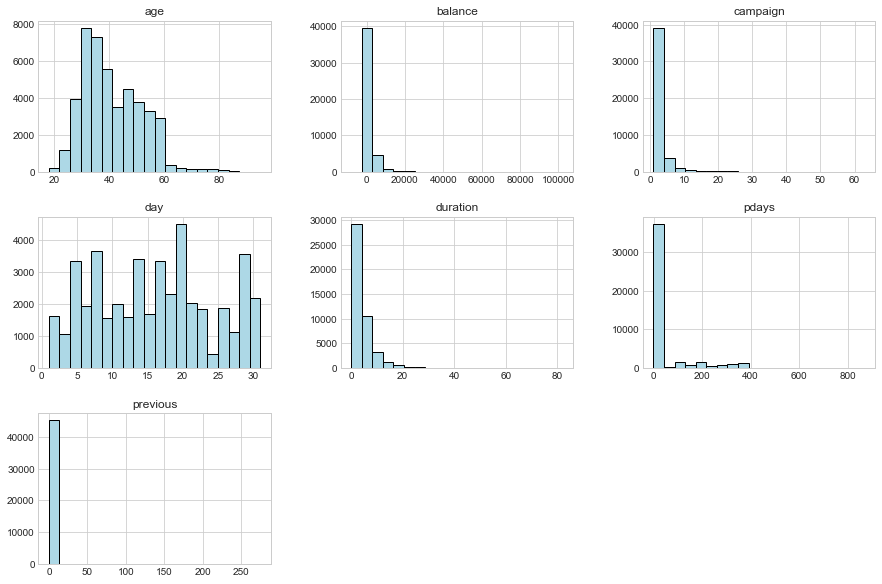

Descriptive stats of duration count    45211.000000
mean         4.302729
std          4.292132
min          0.000000
25%          1.720000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64
Descriptive stats of campaign count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64
Descriptive stats of day count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
Descriptive stats of no of day past the capaign was last done:  count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [7]:
# univariate analysis numeric
newdf = df.copy()
newdf['duration'] = newdf['duration'].apply(lambda n:n/60).round(2)
plt.style.use('seaborn-whitegrid')
newdf.hist(bins=20, color='lightblue', edgecolor='black', figsize=(15,10))
plt.show()
#print("Descriptive stats of age",dataframe1['age'].describe())
print("Descriptive stats of duration",newdf['duration'].describe())
print("Descriptive stats of campaign",newdf['campaign'].describe())
print("Descriptive stats of day", newdf['day'].describe())
print("Descriptive stats of no of day past the capaign was last done: ", newdf['pdays'].describe())

Quick Observation:
AGE:

Age looks uniformally distributed with small standard deviation.
Majority of the people falls in the age group of 30 to 40, that goes to show that most of them are young professional -33 to 48 years old fall within the 25th to 75th percentiles
There seems that bank executve has also called up in the age group of 70-90 which are low in numbers but it i a clear error as they can't be our target age group who will be ineterested in FD.
It also seems that around 1500-1600 student has also been targeted for fd which is most likely to ignore the fd option we will verify that in our bivariate analysis.
Balance:

Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We will treat outliers going forward.
There are around 7K, that is almost 10 % people with negative bank balance which may not be interested in fd at all as they are struggling with finance. So this needs to be taken care from bank side that the call to such people needs to be minimized .
The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.<br>
Duration :
The variable “duration” will need to be dropped before we start building a predictive model because it highly affects the output target (e.g., if duration=0 then y=”no”). Yet, the duration is not known before a call is performed

Campaign:

- Median value for no of times bank contacted  to the given customer is 2 times amd max value is 63 times which seems way to high than the normal. These clients may have some special requirement i feel. 

Day : seems to be normally dustributed,with median value of 16 being the last day of contact

pday & Other numerical values doesn't help much to infer anything significant here. Infact most of the independent numerical attributes has nothing much to descibe(). We will have to do bivariate & multivariate analysis to catch some meaningful insights.

# Boxplot(Univariate analysis) : For Numercial Attributes:

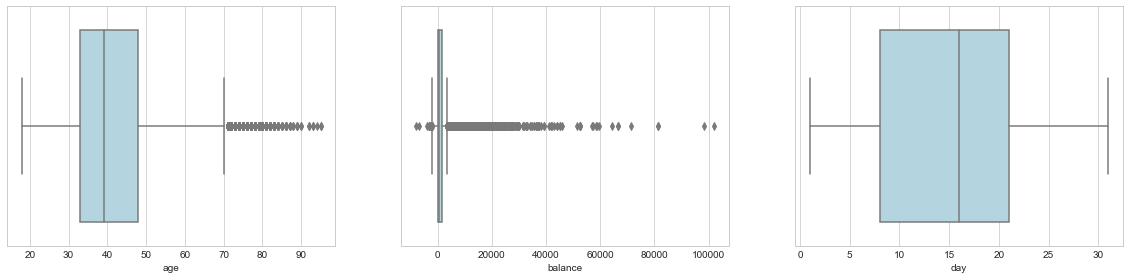

In [8]:
# boxplot on age , balance, day
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x=newdf.age, color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.balance, color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.day, color='lightblue')

plt.show()

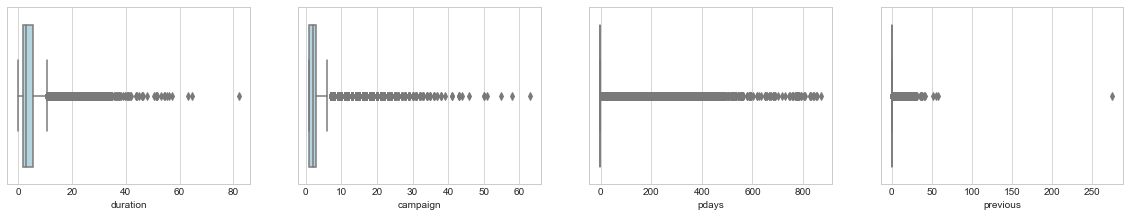

In [9]:
# boxplot on duration, campaign, pdays, previous
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= newdf.duration, color='lightblue')

plt.subplot(4,4,2)
sns.boxplot(x= newdf.campaign, color='lightblue')

plt.subplot(4,4,3)
sns.boxplot(x= newdf.pdays, color='lightblue')

plt.subplot(4,4,4)
sns.boxplot(x= newdf.previous, color='lightblue')

plt.show()

Quick Insights From Boxplot Univariate distribution:
There seems to be an outlier in age, between the age group 70-90.
Max customer falls in the age range of 32-48 . Median age is very close to 40 which i feel banks have targeted consideringf that they will will more aligned to take fd option. but i don't feel so. As the tendency of person nearing retorement or early starter in professinal, i feel can opt for fd. We will verify that going forward.

In balance attribute there seems to be high level of skewness which we also observed in our histplot analayis. There are some extreme outliers brtween 60k euro to 100k euro. There are long tails towards right side so it seems to be highly skewed. -Balance attribute needs to be treated for removing the outlier which we will deal next.

Day attribite seems to be normally distributed with no significant outliers as such.
Rest of the numerical attribute doesn,t seems to be significant and are highly skewed with long tail mostly on the right side. As they are mostly skewed specially pdays and previous days,. There is nothing to statistically find here.

Let's treat outlier in balance attribute below:

In [10]:
from scipy.stats import zscore
import scipy.stats as stats

In [11]:
# skewness in all numerical vars
#stats.skew(df.age)

In [12]:
df.columns[df.dtypes=='int64']

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [13]:
# skewness in all numerical vars
for s in df.dtypes[df.dtypes=='int64'].index:
    a = stats.skew(df[s])
    print(s,a)

age 0.6847952047866451
balance 8.360030947252687
day 0.09307592583897241
duration 3.1442137770103913
campaign 4.898487638410557
pdays 2.615628689259389
previous 41.84506608797322


- age & day seems to be doing ok in terms of skewness
- while balance , duration, campaign, pdays, previous are highly skewed and seems to have lot of outlier

In [14]:
#Removing outliers in balance data using zscore:
from scipy.stats import zscore
z = np.abs(stats.zscore(df.balance))


In [15]:
# threshold 3 >3 outlier
threshold=3
print(np.where(z>3))

(array([   34,    69,   334,   446,   920,  2065,  2343,  2479,  2554,
        2576,  2618,  2619,  2778,  2852,  2899,  2931,  2938,  3012,
        3024,  3099,  3197,  3327,  3500,  3806,  3851,  4025,  4081,
        4135,  4150,  4483,  4583,  4625,  4846,  4851,  4954,  4958,
        4965,  4975,  5007,  5133,  5249,  5279,  5302,  5306,  5309,
        5464,  5613,  5725,  5937,  6342,  6429,  6431,  6529,  6619,
        6779,  6825,  6876,  7014,  7079,  7156,  7169,  7198,  7200,
        7229,  7334,  7362,  7534,  7563,  7627,  7674,  7681,  7743,
        7782,  7822,  7865,  7991,  8008,  8184,  8196,  8244,  8335,
        8349,  8377,  8433,  8472,  8479,  8534,  8555,  8588,  8634,
        8700,  8724,  8828,  8854,  9047,  9068,  9079,  9117,  9162,
        9178,  9239,  9312,  9421,  9425,  9461,  9472,  9536,  9552,
        9564,  9576,  9598,  9625,  9778,  9793,  9803,  9809,  9822,
        9895,  9933, 10038, 10059, 10061, 10062, 10107, 10173, 10180,
       10260, 10262

In [16]:
df1=df[(z<3)]
df1.shape

(44466, 17)

In [17]:
df.shape

(45211, 17)

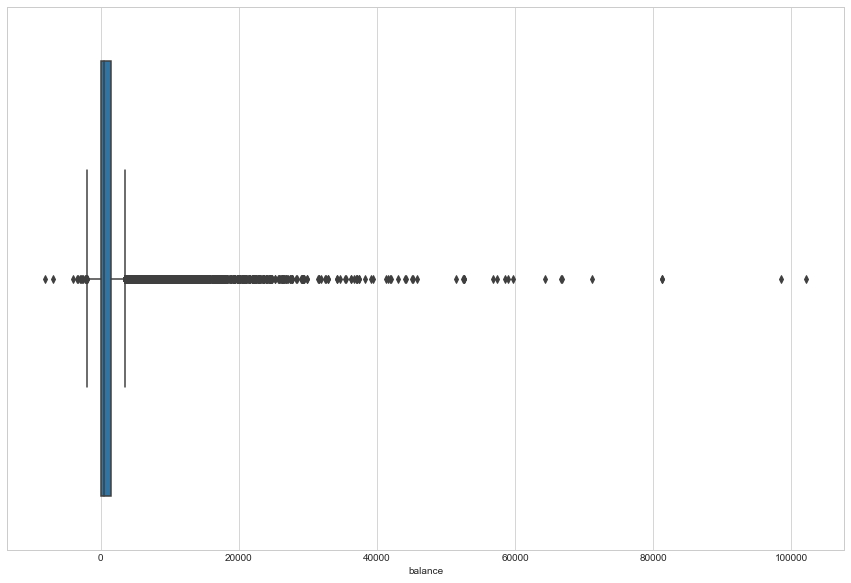

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['balance'], data =df)

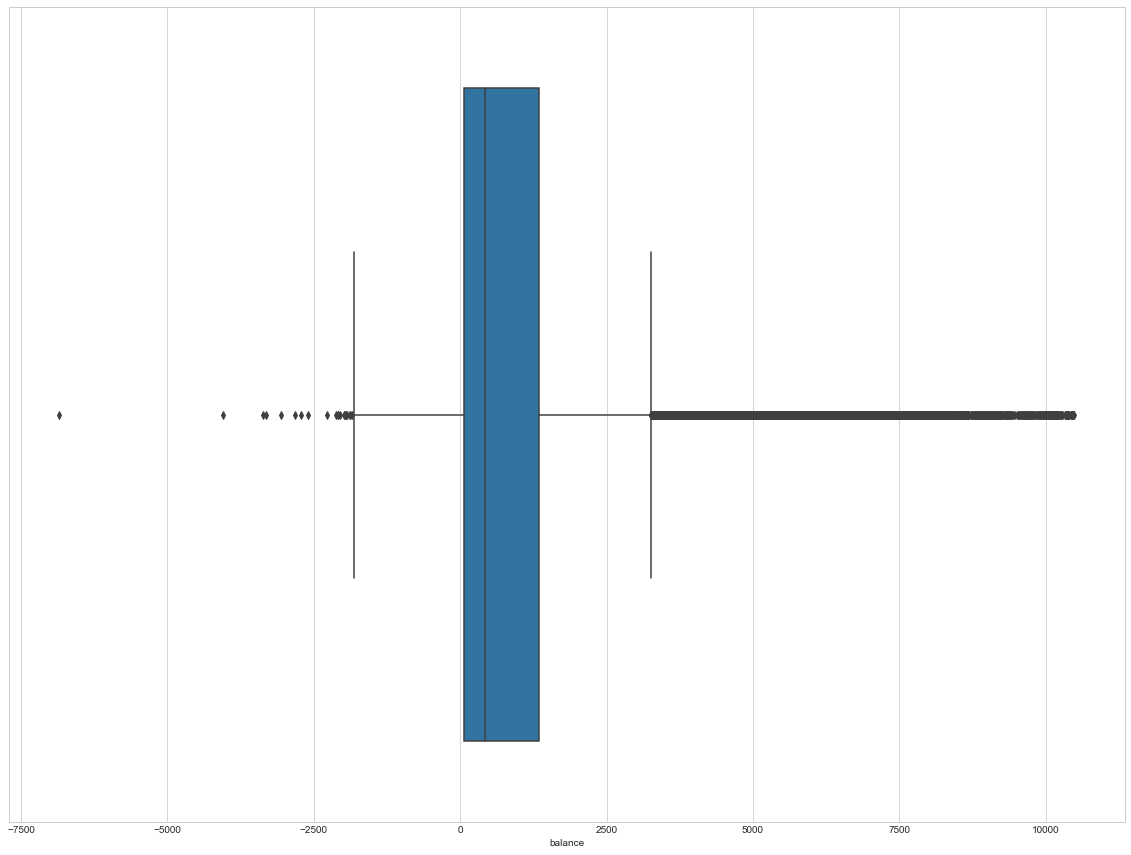

In [19]:
plt.figure(figsize=(20,15))
sns.boxplot(x=df1['balance'], data =df1)

# Univariate Analysis: Categorical Data

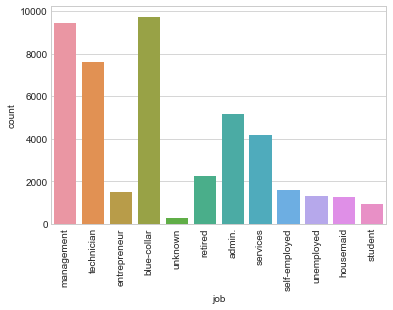

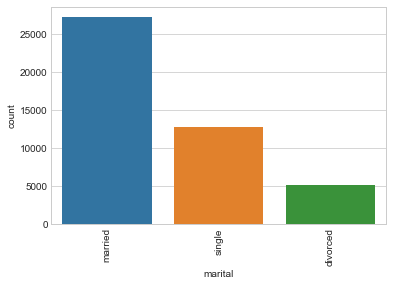

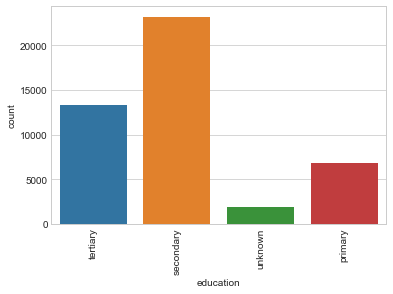

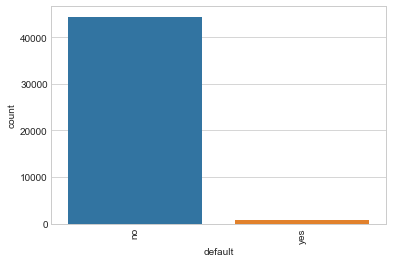

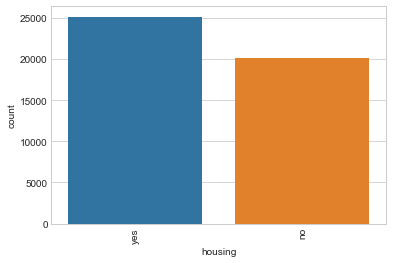

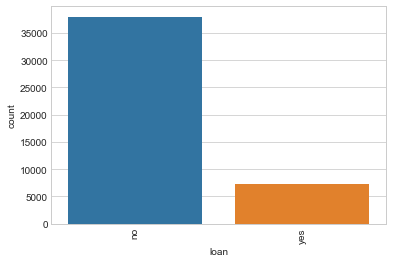

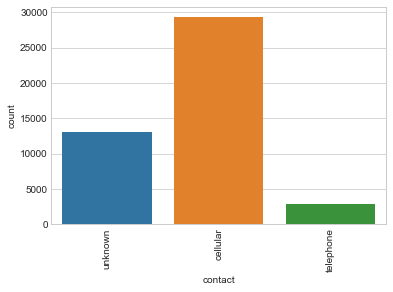

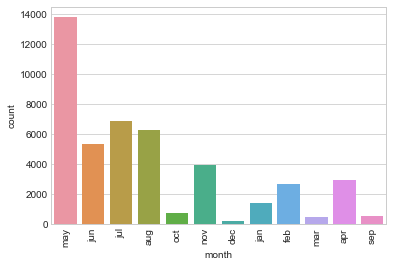

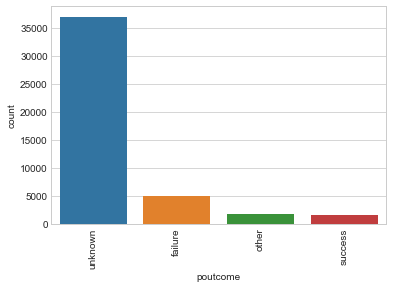

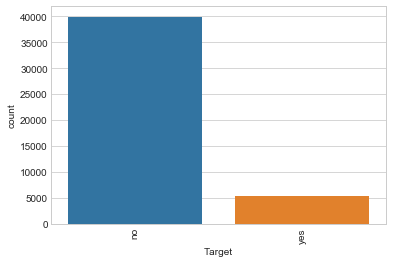

In [20]:
#Univariate Analysis: Categorical Data

for f in newdf.dtypes[newdf.dtypes == 'object'].index:
    sns.countplot(x=f, data=newdf)
    plt.xticks(rotation=90)
    plt.show()

Quick Observation On The Above Categorical Plot
Job Type Distribution:

blue-collar 9732 management 9458 technician 7597 admin. 5171 services 4154 retired 2264 self-employed 1579 entrepreneur 1487 unemployed 1303 housemaid 1240 student 938 unknown 288

Job:

Blue-Collar, Management professionals & technicican jobs are in majority which were targeted by the bank.
There are some cutomers who are unemployed, housemaid, student which were also targeted, which is not the good move as mostly they will not convert as fd customer. Though they are not significant in numbers
There are few unknowns(around 220) people who were targeted, which don't seems to be a value addition so these needs to be ignored
There are also some entrepreneurs and self-employed people which i feel will be hard to convert as fd customer. Chance of entrepreneurs and sel-employed person having FD i feel will be low. We will be verifying that when we do the bivariate analysis on categorical values using Target as hue.
MaritalStataus:

married 27214 single 12790 divorced 5207

ALmost 50% counting to 27214, customers are married which is as expected as they are more saving conscious.
28 % people are single , we expect more convesion rate from young single working professional,we will verify that when we do bivariate analysis
There are some broken customers who are divorced, they account for 11 %, we should not expect them to convert to fd customers. That we will check going forward.
EDUCATION:

Education Level Distribution:

secondary 23202 tertiary 13301 primary 6851 unknown 1857

It seems that around 51 % of the targeted customers are having secondar level of education and around 29 % customers are having qualification beyoind 12th class. It means that the targeted customers 51 % with secondary level education is somewhat not as per expectation and the campaign will not bear fruitful result. We neded to rethink the target audience here. Our focus should be more on working profesionals whose qualification will be beyound secondary level.

We also found some unknown customers whose level of education is not clear this needs to be ignored or resampled.

Arounf 6851 customers are still studying and should not be our target audience.They are very less liskely to take fd option. We will verify the same going forward.

Credit Default:

Distribution: No : 44396 yes : 815

- It is good to see that almost 98 %  of the targeted customers don't default 
 - Only 815 out 45211 people are defaulter and are not credit worthy. These people needs to be ignored while targeting for fd conversion. 

PERSONAL LOAN: no 37967 yes 7244

- 83 % customers have no personal loan lying with them only 17% people who were targeted have personal loan availed. We will see if people with no PL may have availed FD or not when we do bivariate analysis. I feel they are more likely to avail FD as compared to person who already have PL on their head to pay.
Mode Of Communication With Customer:
cellular 29285 unknown 13020 telephone 2906

- Around 64 % mobile phone was used to contact potential customer. It will be interesting to see what was the call duration for the same, as it will impact the conversion rate to larger extent
- Almost 28 % people mode of communication has ot been captured as needed with unknown categorization . These data don't seems to add any value as we don't know how to infer the outcome here. We need to resample this data to make sense and as this accounts for significant potion of the customer. 
- Landline as expected has very low share as a mode of client communication. It gos to show that mobile has overpowered any other mode of people communication including the legendary landline. 

Phone Call Outcome:
unknown 36959 failure 4901 other 1840 success 1511

- It seems that large share of poutcome result which accounts for 80 % has not been captured meaningfully. This makes outcome as an attribute very insignificant to measure and gain any insight
- The entire exercise to convert potentoal customer has not performed to the expecations as paltry 1511 person only responded positive. 
- This attribute needs to be resampled or ignored 

Month Wise Distribution , in a given year When Customer Wsa Last Contacted
may 13766 jul 6895 aug 6247 jun 5341 nov 3970 apr 2932 feb 2649 jan 1403 oct 738 sep 579 mar 477 dec 214

May month seems to have more frequency(13766) where banl connected to the potential customer for FD campaign. It can be also dure to previous year financial closing and to add new customers for FD instrument, to increase bank revenue.

Jun, July , August also have far share but not as mich compared to may month

Frequency of customer contact seems to be droppong as the month progreses after may in a given year. Specially dec month.
March also has very frequency where bank contacted potential customer which looks as expected beacuse of financial year closing.

Target(FD) Variable : no : 39922 yes: 5289

- 88 % of the contacted customers seems to be not interested in FD which usually is the case specially for young customers due to low rate of interest. Also we have see the data distribution of various attributwe where many unkown records existed which are not at all adding to the analysis.
So the  result is not surprising. Here data is imbalanced mostly classified in favour of NO. This situation may lead to high accuracy score and lots of model error for individual clasification models

- Ensemble model where it combines many model seems to be the right solution to compensate the error rate and build string model. We will see this going forward

# BIVARIATE ANALYSIS

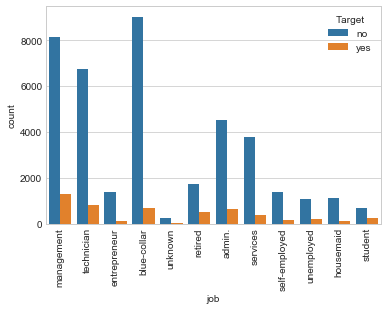

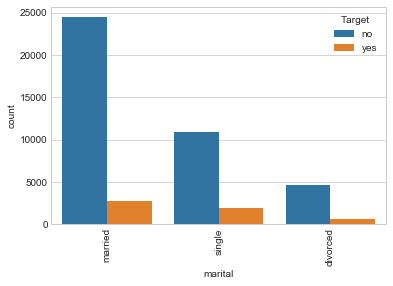

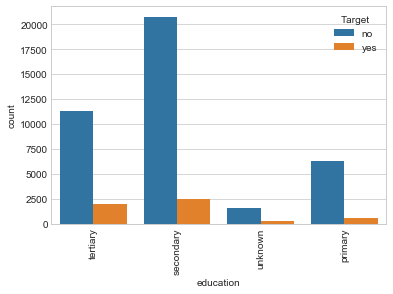

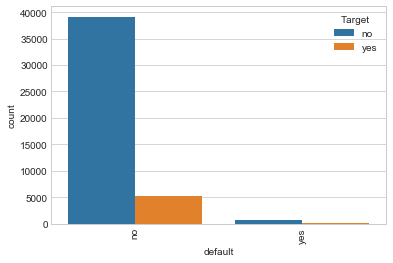

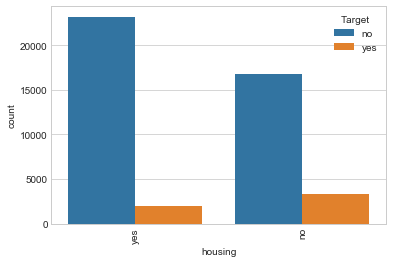

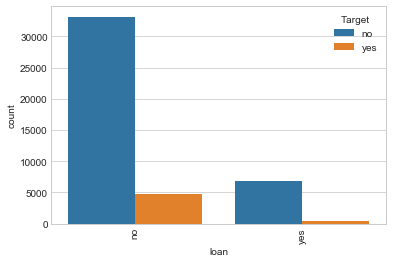

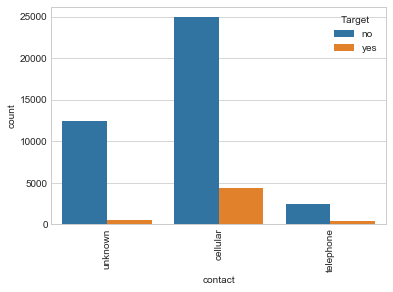

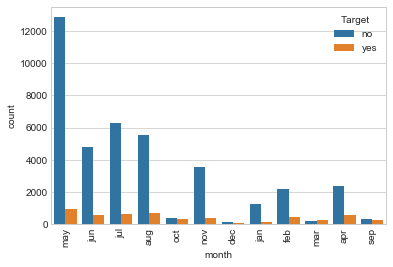

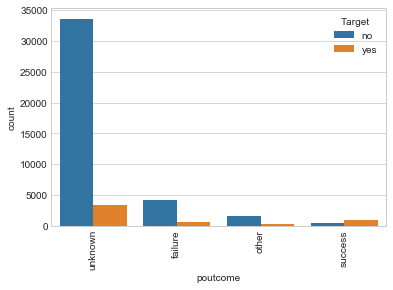

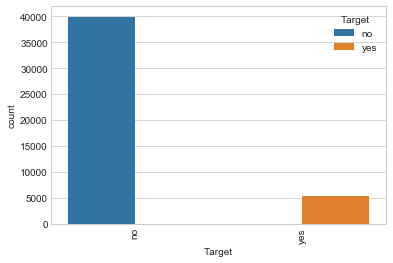

In [21]:
#BIVARIATE ANALYSIS
for f in newdf.dtypes[newdf.dtypes == 'object'].index:#
#for f in newdf:
    sns.countplot(x=f, data=newdf, hue='Target')
    plt.xticks(rotation=90)
    plt.show()

Bivariate Analysis:<br>
FD subscription rate is higher among young people between the age of 30-40 , but one should also consider the fact that distribution of sampled data is imbalanced in terms of no & yes. Given this fact people with 60 and beyond also has fared well in term s of FD subscription<br>
- Management professional seems to be more likely to avail FD option here. 
- Technician also seems to faring well along with blue collar professionals. 

Marital Status Impacts On FD Subscription :

Married customers has higher fd subscription, divorced people are broken and are less likely to avail FD

Higher the education level higher is the rate of Fd subscription

Customer with no Personal loan has higher FD subscription Rate.

Person who has past housing loan seems to avoid FD option as compared to those who doesn,t have Housinh loan

As expected customer with no default history are more liley to opt for FD

As expected cellualr as a mode of communication is leading the count and also the fd subscription rate

May month seems to be best time to conact customer for increasing the rate of FD subscription
- April, jun, july, aug also seems to be farring well but march, dec and jan doesn't look idel time to campaign.

it is clearly visible that if the customer is contacted not more than 5 times they are more likely to opt for FD option.


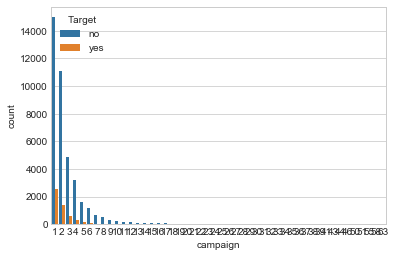

In [22]:
sns.countplot(x=df['campaign'], data=newdf, hue='Target')

# Multivariate Analysis

# Age & Balance relationship

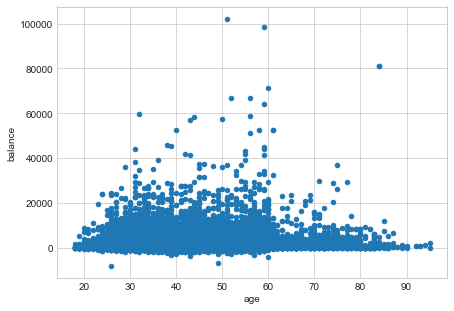

In [23]:
# Age and Balance
newdf.plot.scatter('age','balance',figsize=(7,5))
plt.show()

There seems to no linear relationship between age & balance and Based on this scatter plot, there is no clear relationship between client’s age and balance level. Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

# duration , campiagn relationship

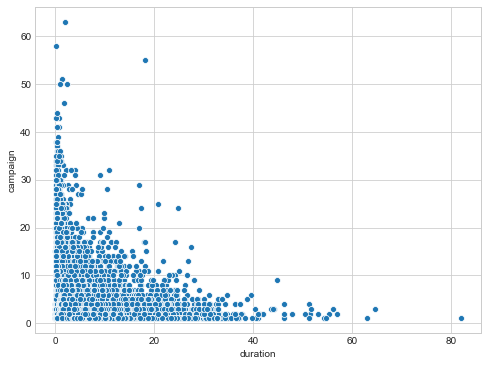

In [24]:
# duration , campiagn
plt.figure(figsize=(8,6))
sns.scatterplot(newdf.duration, newdf.campaign)
plt.show()

- we can see some kind trend here, when frequency of contacting the same client increases, call duration which happens with the client decreases, it's a kind of nrgative correlation.So it is advisable that the less is the frequency longer is the call duration which may result in better conversion rate. 
- If the contact frequency is between 5-10 call duration is more and it may result in better outcome as far as FD is concerned

# EDUCATION & BANK BALANCE

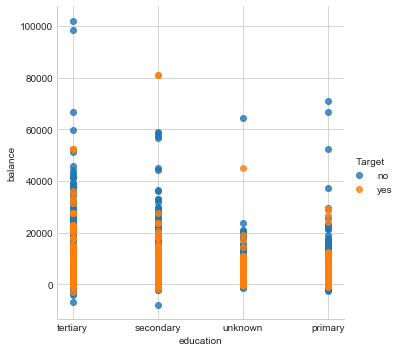

In [25]:
# EDUCATION & BANK BALANCE
sns.lmplot(x='education', y='balance', data=newdf, hue='Target', fit_reg=False)

Seems across the education levels FD desposits are uniform 

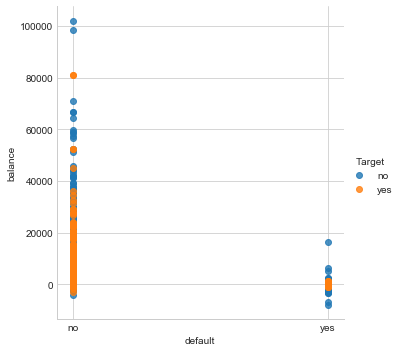

In [26]:
# default, balance
sns.lmplot(x='default', y='balance', data=newdf, hue='Target', fit_reg=False)

Clearly shows customers with no default subscribed more

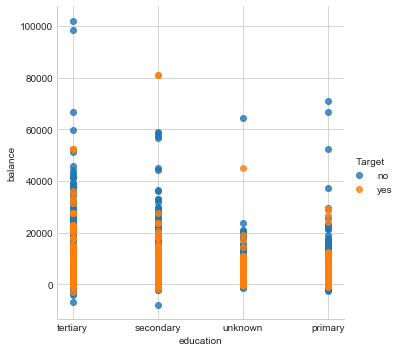

In [27]:
sns.lmplot(x='education', y='balance', data=newdf, hue='Target', fit_reg=False)

seems no correlation as subsriptions are scross education levels

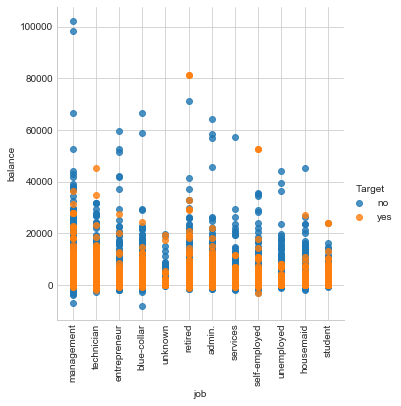

In [28]:
sns.lmplot(x='job', y='balance', data=newdf, hue='Target', fit_reg=False)
plt.xticks(rotation=90)
plt.show()

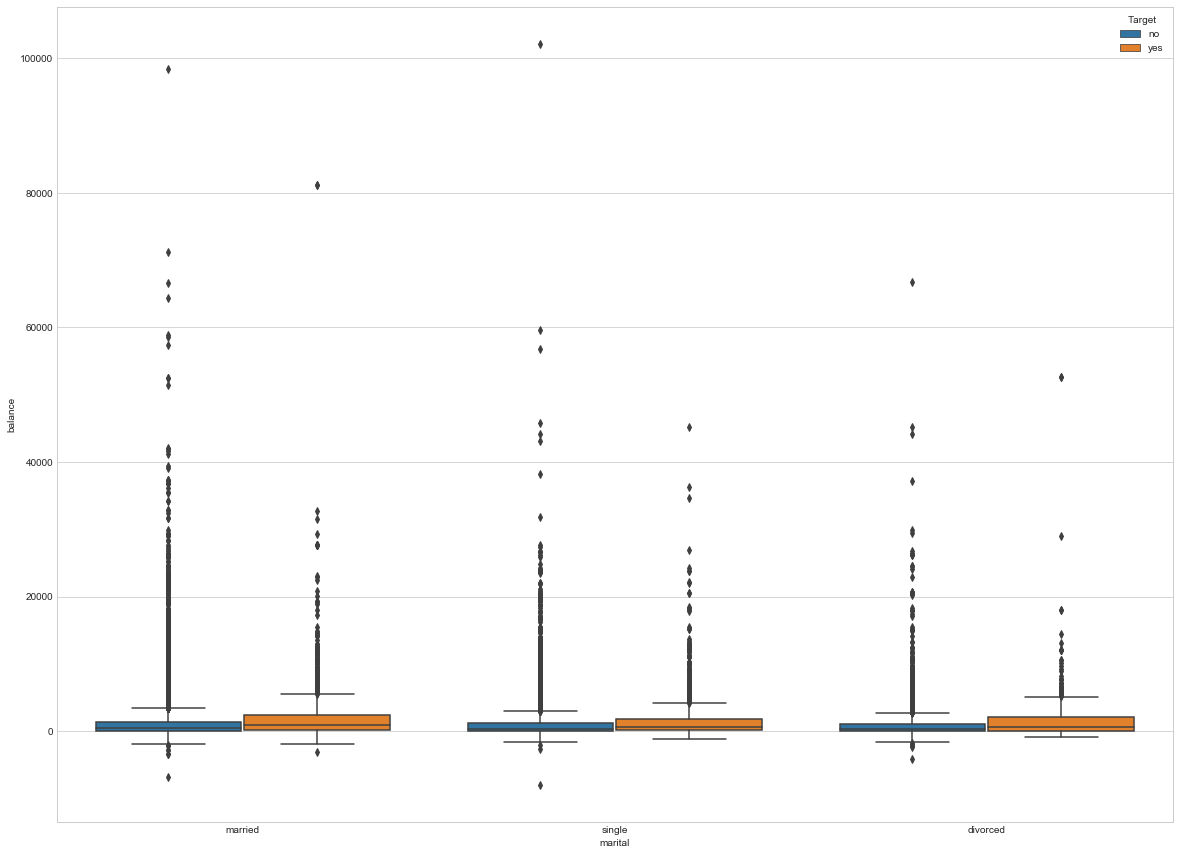

In [29]:
plt.figure(figsize=(20,15))
sns.boxplot(df['marital'], df['balance'], data=newdf, hue='Target')
plt.show()

As we saw above young that young people are more subsciber of FD, here also we can say that young unmarried person are leading the way with 15 % FD subscription rate,out of total subscribed fd customer.
Divorce seems to unexpectedly ranking higher thab married customer.
Married one's are less oriented towards FD option.

# CORRELATION MATRIX FOR ALL THE NUMERICAL ATTRIBUTES

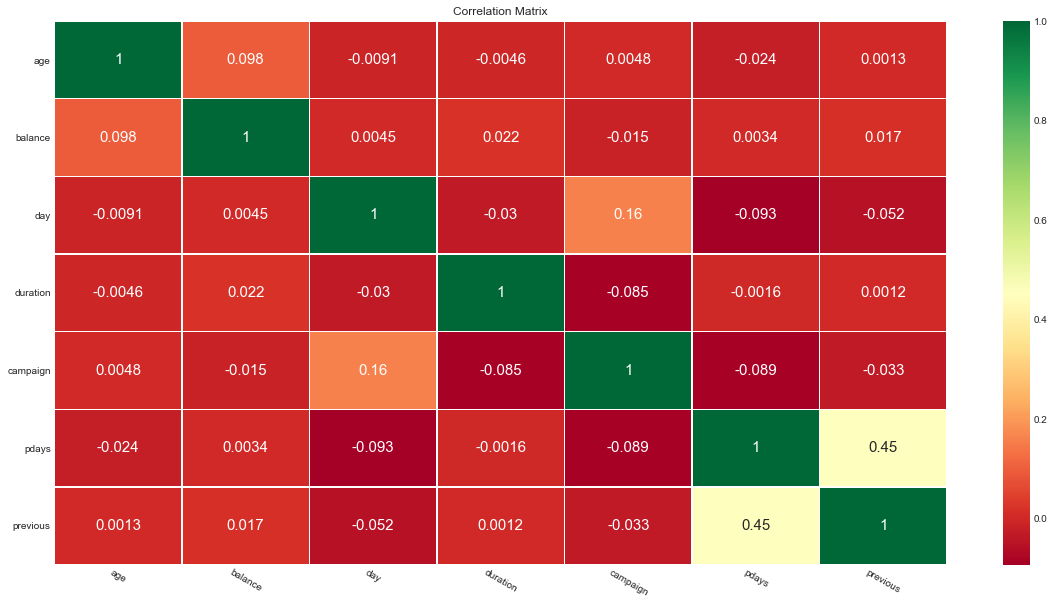

In [30]:
c =newdf.corr()
#plt.figure(figsize=(10,5))
sns.heatmap(c, annot=True,linewidths=0.3,annot_kws={'size':15},cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. 
- We will further understand their influences on campaign outcome while building ML models.

# Cleaning Up Data & Preparing Data For Model Building

In [31]:
# There are no missing values as we observed earlier
# let us treat poutcome
newdf = df.copy()
newdf['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [32]:
# drop unknow from job
newdf = newdf[newdf.job !='unknown']

# drop unknown marital status
newdf = newdf[newdf.marital !='unknown']
# delete default
del newdf['default']
#delete duration
del newdf['duration']

In [33]:
# delete contact variable as it is less significant
del newdf['contact']

In [34]:
#Combining entrepreneurs and self-employed into self-employed
newdf.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)
#Combining administrative and management jobs into admin_management
newdf.job.replace(['admin.', 'management'], 'administration_management', inplace=True)
#Combining blue-collar and tecnician jobs into blue-collar
newdf.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)
#Combining retired and unemployed into no_active_income
newdf.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)

In [35]:
#Combining single and divorced into single
newdf.marital.replace(['single', 'divorced'], 'single', inplace=True)

# Pre-processing Data

# Transforming All Categorical Column to Numercial Values using Onehot encoding

In [36]:
# pre-processing
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for v in newdf.dtypes[newdf.dtypes == 'object'].index:

    newdf[v] = lb_make.fit_transform(newdf[v])
newdf

,age,job,marital,education,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,Target
0,58,0,0,2,2143,1,0,5,8,1,-1,0,3,0
1,44,1,1,1,29,1,0,5,8,1,-1,0,3,0
2,33,4,0,1,2,1,1,5,8,1,-1,0,3,0
3,47,1,0,3,1506,1,0,5,8,1,-1,0,3,0
5,35,0,0,2,231,1,0,5,8,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,2,825,0,0,17,9,3,-1,0,3,1
45207,71,3,1,0,1729,0,0,17,9,2,-1,0,3,1
45208,72,3,0,1,5715,0,0,17,9,5,184,3,2,1
45209,57,1,0,1,668,0,0,17,9,4,-1,0,3,0


In [37]:
from sklearn.metrics import confusion_matrix,f1_score, classification_report, precision_score, roc_curve, auc, average_precision_score,roc_auc_score,accuracy_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [38]:
# train test split
X = newdf.drop('Target', axis=1)
y = newdf['Target']
# Split into 70% training and 30% testing set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31446, 13)
(13477, 13)
(31446,)
(13477,)


# Feature Scaling

Min-Max Scaling & Standard Scaler

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#MINMAX: 
minmax= MinMaxScaler()
X_train2 = pd.DataFrame(minmax.fit_transform(X_train))
X_test2 = pd.DataFrame(minmax.transform(X_test))


MinMax_X_train = X_train2
MinMax_X_test = X_test2
#print("Mimmax scaled train data\n", MinMax_X_train)
#print("Mimmax scaled test data\n", MinMax_X_test)

#STANDARD Sclaer: 

stdsc= StandardScaler()
X_train3 = pd.DataFrame(stdsc.fit_transform(X_train))
X_test3 = pd.DataFrame(stdsc.transform(X_test))

StdSc_X_train = X_train3
StdSc_X_test = X_test3

# Hunt For Best Base Classification Supervised Learning Model:

Logistic Regression using Standard scalar training and test set

In [41]:
# LogisticRegression with std scalar
classifier = LogisticRegression(random_state = 0,class_weight='balanced')
classifier.fit(StdSc_X_train, y_train)
sy_pred = classifier.predict(StdSc_X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, sy_pred)
print('Confusion Matrix')
print(cm)
print('Accuracy Score',accuracy_score(y_test, sy_pred))
print('F1 score', f1_score(y_test, sy_pred))
print('Classification Score')
print(classification_report(y_test, sy_pred))

Confusion Matrix
[[7620 4238]
 [ 592 1027]]
Accuracy Score 0.6416116346367886
F1 score 0.2983730389308541
Classification Score
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     11858
           1       0.20      0.63      0.30      1619

    accuracy                           0.64     13477
   macro avg       0.56      0.64      0.53     13477
weighted avg       0.84      0.64      0.70     13477



In [42]:
# LogisticRegression with minmax scalar
classifier = LogisticRegression(random_state = 0, class_weight='balanced')
classifier.fit(MinMax_X_train, y_train)
y_pred = classifier.predict(MinMax_X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score', f1_score(y_test, y_pred))
print('Classification Score:')
print( classification_report(y_test, y_pred))

Confusion Matrix
[[7547 4311]
 [ 588 1031]]
Accuracy score: 0.6364918008458856
F1 score 0.2962218072116075
Classification Score:
              precision    recall  f1-score   support

           0       0.93      0.64      0.75     11858
           1       0.19      0.64      0.30      1619

    accuracy                           0.64     13477
   macro avg       0.56      0.64      0.53     13477
weighted avg       0.84      0.64      0.70     13477



In [43]:
# DecisionTreeClassifier minmax
classifier = DecisionTreeClassifier()
classifier.fit(MinMax_X_train, y_train)
y_pred = classifier.predict(MinMax_X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score', f1_score(y_test, y_pred))
print('Classification Score:')
print( classification_report(y_test, y_pred))

Confusion Matrix
[[10634  1224]
 [ 1173   446]]
Accuracy score: 0.8221414261334125
F1 score 0.2712070538157495
Classification Score:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11858
           1       0.27      0.28      0.27      1619

    accuracy                           0.82     13477
   macro avg       0.58      0.59      0.58     13477
weighted avg       0.82      0.82      0.82     13477



In [44]:
# DecisionTreeClassifier with std scalar
classifier = DecisionTreeClassifier()
classifier.fit(StdSc_X_train, y_train)
sy_pred = classifier.predict(StdSc_X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, sy_pred)
print('Confusion Matrix')
print(cm)
print('Accuracy Score',accuracy_score(y_test, sy_pred))
print('F1 score', f1_score(y_test, sy_pred))
print('Classification Score')
print(classification_report(y_test, sy_pred))

Confusion Matrix
[[10667  1191]
 [ 1156   463]]
Accuracy Score 0.8258514506195741
F1 score 0.282920867705469
Classification Score
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11858
           1       0.28      0.29      0.28      1619

    accuracy                           0.83     13477
   macro avg       0.59      0.59      0.59     13477
weighted avg       0.83      0.83      0.83     13477



In [45]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# with duration and without scaling Ensemble Bagging method
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Ensemble Bagging method

In [ ]:
# Ensemble Bagging method
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
rfc = RandomForestClassifier(criterion='gini', n_estimators = 1000)#criterion = entopy,gini
rfc.fit(StdSc_X_train, y_train)
rfcpred = rfc.predict(StdSc_X_test)


print("RFC Accuracy Score:",round(accuracy_score(y_test, rfcpred),2)*100)
print("RFC F1 Score ",f1_score(y_test, rfcpred))
print(classification_report(y_test,rfcpred))

# Oversampling Using SMOTE method:

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_SMOTE, y_SMOTE = sm.fit_sample(StdSc_X_train, y_train)
pd.Series(y_SMOTE).value_counts()

sc = StandardScaler()
sc.fit(X_SMOTE)
X_train_std = sc.transform(X_SMOTE)
X_test_std = sc.transform(StdSc_X_test)

In [ ]:
# DecisionTreeClassifier with SMOTE
classifier = DecisionTreeClassifier()
classifier.fit(X_train_std,y_SMOTE)
smt_pred = classifier.predict(X_test_std)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, smt_pred)
print('Confusion Matrix')
print(cm)
print('Accuracy Score',accuracy_score(y_test, smt_pred))
print('F1 score', f1_score(y_test, smt_pred))
print('Classification Score')
print(classification_report(y_test, smt_pred))

In [ ]:
# LogisticRegression with SMOTE
classifier = LogisticRegression(random_state = 0, class_weight='balanced')
classifier.fit(X_train_std,y_SMOTE)
lsmt_pred = classifier.predict(X_test_std)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, lsmt_pred)
print('Confusion Matrix')
print(cm)
print('Accuracy score:',accuracy_score(y_test, lsmt_pred))
print('F1 score', f1_score(y_test, lsmt_pred))
print('Classification Score:')
print( classification_report(y_test, lsmt_pred))

# Overall decision tree fared well across the board